In [3]:
# Features: total_rooms', 'median_income', 'housing_median_age', 'population'
# Target: 'median_house_value'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv('housing.csv')
df = data[['total_rooms', 'median_income', 'housing_median_age', 'population', 'median_house_value']]
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         20640 non-null  float64
 1   median_income       20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   population          20640 non-null  float64
 4   median_house_value  20640 non-null  float64
dtypes: float64(5)
memory usage: 806.4 KB


,total_rooms,median_income,housing_median_age,population,median_house_value
0,880.0,8.3252,41.0,322.0,452600.0
1,7099.0,8.3014,21.0,2401.0,358500.0
2,1467.0,7.2574,52.0,496.0,352100.0
3,1274.0,5.6431,52.0,558.0,341300.0
4,1627.0,3.8462,52.0,565.0,342200.0


Text(0.5, 1.0, 'Correlation Matrix')

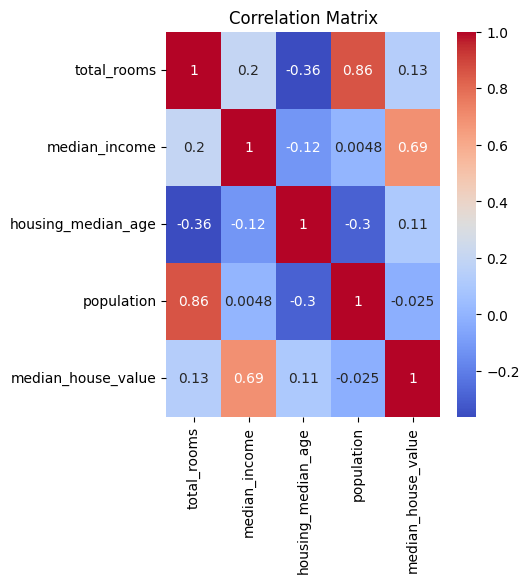

In [5]:
plt.figure(figsize=(15, 5))
    
# Correlation heatmap
plt.subplot(131)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

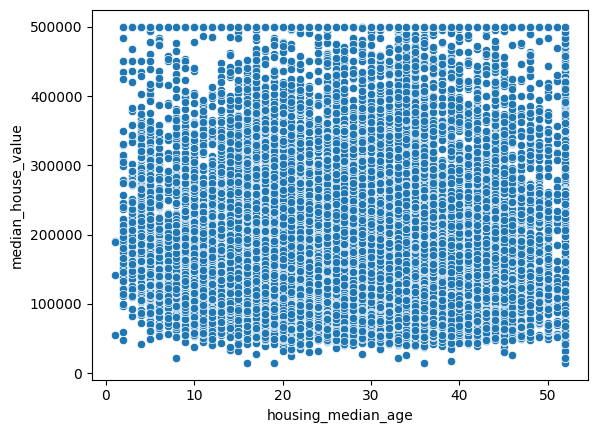

In [6]:
plt.subplot()
sns.scatterplot(x='housing_median_age', y='median_house_value', data=data)

<Axes: xlabel='total_rooms', ylabel='median_house_value'>

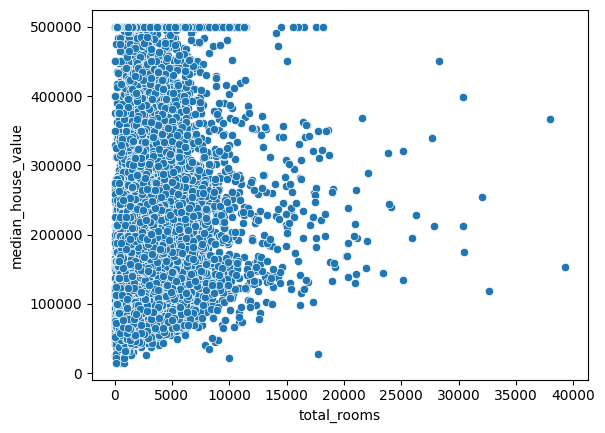

In [7]:
plt.subplot()
sns.scatterplot(x='total_rooms', y='median_house_value', data=data)

In [9]:
X = data[['total_rooms', 'median_income', 'housing_median_age', 'population']]
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_test_pred = model.predict(X_test)

print('Score or R-Squared:', model.score(X_test, y_test))

print('Root Mean Squared Error:', 
      np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Điểm R square thấp cho thấy mô hình dự đoán sai lệch nhiều. Điều này có thể là sự tương quan giữa các biến đầu vào và đầu ra chưa cao. 
# Điểm RSME thấp cho thấy kết quả dự đoán và giá trị thực tế chênh lệch khoảng 81840 đơn vị.

Score or R-Squared: 0.5008035122132626
Root Mean Squared Error: 81840.52982661463
